# **Recomendaciones Predictivas de Peliculas**🎥


In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

# **Visualizamos los dataframes**📝




In [ ]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


#  **Unimos los Dataframe**🫱🏽‍🫲🏻

In [ ]:
df= df_ratings.merge(df_books, on="isbn",how="left")

In [ ]:
df.head()

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5.0,Rites of Passage,Judith Rae
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather


In [ ]:
df.shape

(1149780, 5)

# **Filtro**
* Usuarios que hayan dejado más de 100 reviews
* Libros con más de 50 reviews

In [ ]:
users = df["user"].value_counts()
isbn =  df["isbn"].value_counts()
users=users[users>=100].index
isbn=isbn[isbn>=50].index

In [ ]:
#Crea un nuevo dataframe
df = df.loc[(df["user"].isin(users.values))&(df["isbn"].isin(isbn.values))]

In [ ]:
#borrar reviews repetidas
df=df.drop_duplicates(['title','user'])

In [ ]:
df.isna().sum()

user        0
isbn        0
rating      0
title     529
author    529
dtype: int64

No toma en cuenta isbns sin titulo ni autor

In [ ]:
df.dropna(how = 'any')

,user,isbn,rating,title,author
413,276925,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
426,276925,0316666343,0.0,The Lovely Bones: A Novel,Alice Sebold
427,276925,0345391810,0.0,The Restaurant at the End of the Universe (Hit...,Douglas Adams
429,276925,0385504209,8.0,The Da Vinci Code,Dan Brown
448,276925,0679745580,0.0,In Cold Blood (Vintage International),TRUMAN CAPOTE
...,...,...,...,...,...
1149604,276680,0743486226,6.0,Angels &amp; Demons,Dan Brown
1149616,276680,0812969812,0.0,Blessings : A Novel,ANNA QUINDLEN
1149628,276680,1573222267,0.0,Blue Shoe,Anne Lamott
1149629,276680,1573229083,7.0,My Dream of You,Nuala O'Faolain


In [ ]:
df.shape

(118345, 5)

In [ ]:
df_pivot = df.pivot(index="title", columns="user", values="rating").fillna(0)

In [ ]:
df_pivot.head()

user,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
NaN,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_matrix = csr_matrix(df_pivot.values)

In [ ]:
#Crear y entrenar el modelo
nn = NearestNeighbors(metric='cosine')
nn.fit(df_matrix)

NearestNeighbors(metric='cosine')

In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

  recommended_books = [book,[]]

  distance, book_info= nn.kneighbors([df_pivot.loc[book]], 6, return_distance=True)
  recom_book_info = df_pivot.iloc[np.flip(book_info[0])[:-1]].index.to_list()
  recom_distance = list(np.flip(distance[0])[:-1])

  for r in zip(recom_book_info,recom_distance):
    recommended_books[1].append(list(r))
  return recommended_books

In [ ]:
df_pivot.head()

user,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
NaN,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pivot.tail()

user,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stardust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


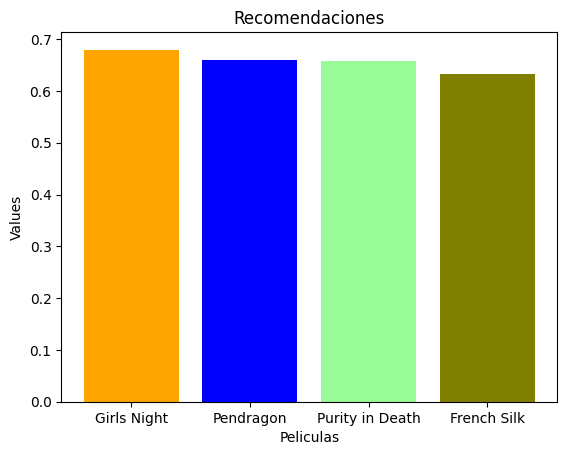

In [ ]:
import matplotlib.pyplot as plt

label1=(get_recommends('16 Lighthouse Road')[1][0][0])+""
label2=(get_recommends('16 Lighthouse Road')[1][1][0])+""
label3=(get_recommends('16 Lighthouse Road')[1][2][0])+""
label4=(get_recommends('16 Lighthouse Road')[1][3][0])+""
# Define bar labels
bar_labels = [label1, label2, label3, label4]

# Define data for each bar
data = [get_recommends('16 Lighthouse Road')[1][0][1],
        get_recommends('16 Lighthouse Road')[1][1][1],
        get_recommends('16 Lighthouse Road')[1][2][1],
        get_recommends('16 Lighthouse Road')[1][3][1]]

bar_colors = ['orange', 'blue', 'palegreen', 'olive']

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bar plot
ax.bar(bar_labels, data,color=bar_colors)

# Add title and labels
ax.set_title('Recomendaciones')
ax.set_xlabel('Peliculas')
ax.set_ylabel('Values')

# Show the plot
plt.show()

In [ ]:
get_recommends('16 Lighthouse Road')

['16 Lighthouse Road',
 [['Girls Night', 0.6796759],
  ['Pendragon', 0.65912086],
  ['Purity in Death', 0.65861964],
  ['French Silk', 0.63281465],
  ['Imitation in Death (Eve Dallas Mysteries (Paperback))', 0.54404306]]]